In [1]:
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.modeling.models import BlackBody

from dust_extinction.parameter_averages import G23

In [2]:
file = fits.open('sensitivity.fits')
print(file.info())

Filename: sensitivity.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   ()      
  1  TELLURIC      1 BinTableHDU     80   1R x 21C   [3444D, 3444D, 3444D, 7D, D, D, D, D, D, D, D, 6D, D, L, K, K, K, K, K, D, D]   
  2  SENS          1 BinTableHDU     74   1R x 16C   [33794D, 33794D, 33794D, 33794D, 33794L, 33794D, 33794L, 6D, K, K, D, D, 3444D, 3444D, 3444D, 3444L]   
  3  WAVE          1 ImageHDU        19   (1, 6497)   float64   
  4  ZEROPOINT     1 ImageHDU        19   (1, 6497)   float64   
  5  THROUGHPUT    1 ImageHDU        19   (1, 6497)   float64   
None


In [3]:
data = file[1].data
print(data.columns)

ColDefs(
    name = 'WAVE'; format = '3444D'; dim = '(3444)'
    name = 'TELLURIC'; format = '3444D'; dim = '(3444)'
    name = 'OBJ_MODEL'; format = '3444D'; dim = '(3444)'
    name = 'TELL_THETA'; format = '7D'; dim = '(7)'
    name = 'TELL_PRESS'; format = 'D'
    name = 'TELL_TEMP'; format = 'D'
    name = 'TELL_H2O'; format = 'D'
    name = 'TELL_AIRMASS'; format = 'D'
    name = 'TELL_RESLN'; format = 'D'
    name = 'TELL_SHIFT'; format = 'D'
    name = 'TELL_STRETCH'; format = 'D'
    name = 'OBJ_THETA'; format = '6D'; dim = '(6)'
    name = 'CHI2'; format = 'D'
    name = 'SUCCESS'; format = 'L'
    name = 'NITER'; format = 'K'
    name = 'ECH_ORDERS'; format = 'K'
    name = 'POLYORDER_VEC'; format = 'K'
    name = 'IND_LOWER'; format = 'K'
    name = 'IND_UPPER'; format = 'K'
    name = 'WAVE_MIN'; format = 'D'
    name = 'WAVE_MAX'; format = 'D'
)


In [4]:
wave = data["WAVE"][0]
flux = data["OBJ_MODEL"][0]

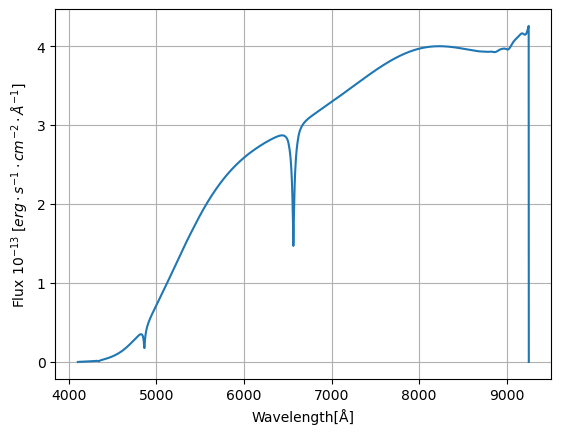

In [9]:
plt.plot(wave, flux/1e4)
plt.grid()
plt.xlabel("Wavelength[Å]")
plt.ylabel("Flux $10^{-13}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]")
plt.savefig("sens_func_example.png", dpi=300)
plt.show()

In [6]:
print(flux)

[0.00000000e+00 7.84110508e+00 9.39152821e+00 ... 4.24974009e+04
 4.25643021e+04 0.00000000e+00]
